# Actividad: Clasificación con máquina de vectores de soporte y redes de neuronas

## Información:
**Nombre:** José Miguel Pereira Pontón

**Fecha:** 23/01/2023


## Puntos a Revisar

* Análisis descriptivos

* Modelo de clasificación con Máquina de Soporte Vectorial (SVM)

* Modelo de clasificación con Redes Neuronales


## Mención:

La información analizada en el presente trabajo se encuentra obtenida de: https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation?resource=download



## Análisis Descriptivo

In [1]:
# Importamos las librerías
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lectura de la información
spotifyData = pd.read_csv('data.csv')

Primero vamos a revisar la estructura de los datos presentes en el dataset

In [3]:
spotifyData.shape

(195, 14)

Se tienen 195 filas o records, con un total de 14 variables.
Vamos a ver las primeras 5 filas del dataset

In [4]:
spotifyData.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


* danceability: Describe si una canción es bailable. 0 es menos bailable y 1 es más bailable.
* energy: Medición de la intensidad y actividad perceptiva de una canción. 0 baja energía y 1 alta energía.
* key: La tonalidad en la que se encuentra la canción.
* loudness: Volumen general de una pista en dB. Se trata de un valor ponderado. Valores entre -60 dB y 0 dB.
* mode: La modalidad de una pista, en menor o mayor, de una canción. 0 representa menor y 1 escala mayor.
* speechiness: Presencia de palabras habladas en una pista.
* aousticness: Medida de confianza para indicar que una pista es acustica. 1 la pista es acústica.
* instrumentalness: Predice si una canción no contiene voces.
* liveness: Detecta la presencia de audiencia en la grabación.
* valence: Positividad transmitida en la canción.
* tempo: Tempo estimado en una canción en Beats por Minuto (BPM).
* duration_ms: Duración de la canción en ms.
* time_signature: firma de tiempo en la canción.
* liked: 1 para una canción que me gustó, 0 no me gustó la canción.


In [5]:
#Resumen descriptivo de los valores númericos
spotifyData.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


* danceability: 
    * El mínimo valor registrado es de 0.13, casi nada bailable.
    * El máximo valor registrado es de 0.946, una canción muy bailable.
    * El 25% de la muestra posee un valor por debajo de 0.4625, que podriamos considerar que el 25% de las canciones son muy poco bailables
    * El 50% de la muestra posee un valor por debajo de 0.705. 
    * El 50% restante de las canciones se encuentran en una valor de bailabilidad por encima de 0.705, es decir que la mitad de las canciones son muy bailables.

* energy: Medición de la intensidad y actividad perceptiva de una canción. 0 baja energía y 1 alta energía.
    * El valor mínimo de energía registrado es de 0.0024, mientras que su máximo valor se encuentra en 0.996.
    * Al 25% de la muestra se observa que transmiten un valor por debajo de 0.5335 en energía. Lo que indica que el 75% restante de canciones transmiten más de 0.5335 en sus canciones. 
    * El valor medio de energía es 0.659.
    
* key: La tonalidad en la que se encuentra la canción.
    * El 25% de las canciones se encuentran por debajo de la 2da tonada. 
    * El 50% de las canciones se encuentran por debajo de la 6ta tonada. 
    * El 75% de las canciones se encuentran por debajo de la 8 tonada.
    * El 25% restante se encuentra entre la 9 y la 11 tonada.
    
* loudness: Volumen general de una pista en dB. Se trata de un valor ponderado. Valores entre -60 dB y 0 dB.
    * El valor mínimo registrado de volumen es de -42.261 y su valor máximo es de -2.336.
    * El 50% de las canciones posee un volumen general entre -42.261 y -7.766.
    
* mode: La modalidad de una pista, en menor o mayor, de una canción. 0 representa menor y 1 escala mayor.
    * Se observa una repartición del 50% en cuanto al modo. Siendo esta variable dicotómica.
    
* speechiness: Presencia de palabras habladas en una pista.
    * El 25% de la muestra presentan palabras un 5.68% de la pista.
    * El 50% de la muestra de canciones, tiene por debajo de un 9.62% de palabras en la pista.
    * El 75% de las canciones, tiene por debajo un 23% de la pista palabras.
    * El valor máximo del porcentaje de palabras en una pista es del 54% de la pista.
    
* aousticness: Medida de confianza para indicar que una pista es acustica. 1 la pista es acústica.
    * El mínimo valor de acústica medible es de aproximadamente el 0%. Es una canción nada acústica. Mientras que el máximo valor de confianza de una canción es del 99.5%.
    * Al 50% de las canciones se tiene una confianza menor del 21.3% de ser acústica.
    
* instrumentalness: Predice si una canción no contiene voces.
    * El 75% de las están por debajo de un 9.75% que no posee voz en la canción.
    
* liveness: Detecta la presencia de audiencia en la grabación.
    * El 75% de las canciones se encuentran con un porcentaje del 17.7% de presencia de audiencia en la grabación.
    * Es un porcentaje bajo de canciones grabadas en vivo.
    
* duration_ms: Duración de la canción en ms.
    * La mínima duración de una canción es de 72152 en ms.
    * La duración promedio es de 213408 en ms.
    * La duración máxima es de 655213 en ms.

In [6]:
spotifyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


Se logra apreciar que no existen datos faltantes, y que los valores:
* danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence y tempo son del tipo flotantes.
* key, mode, duration_ms, time_signature y liked son variables enteras.

## Gráficos de Pareja

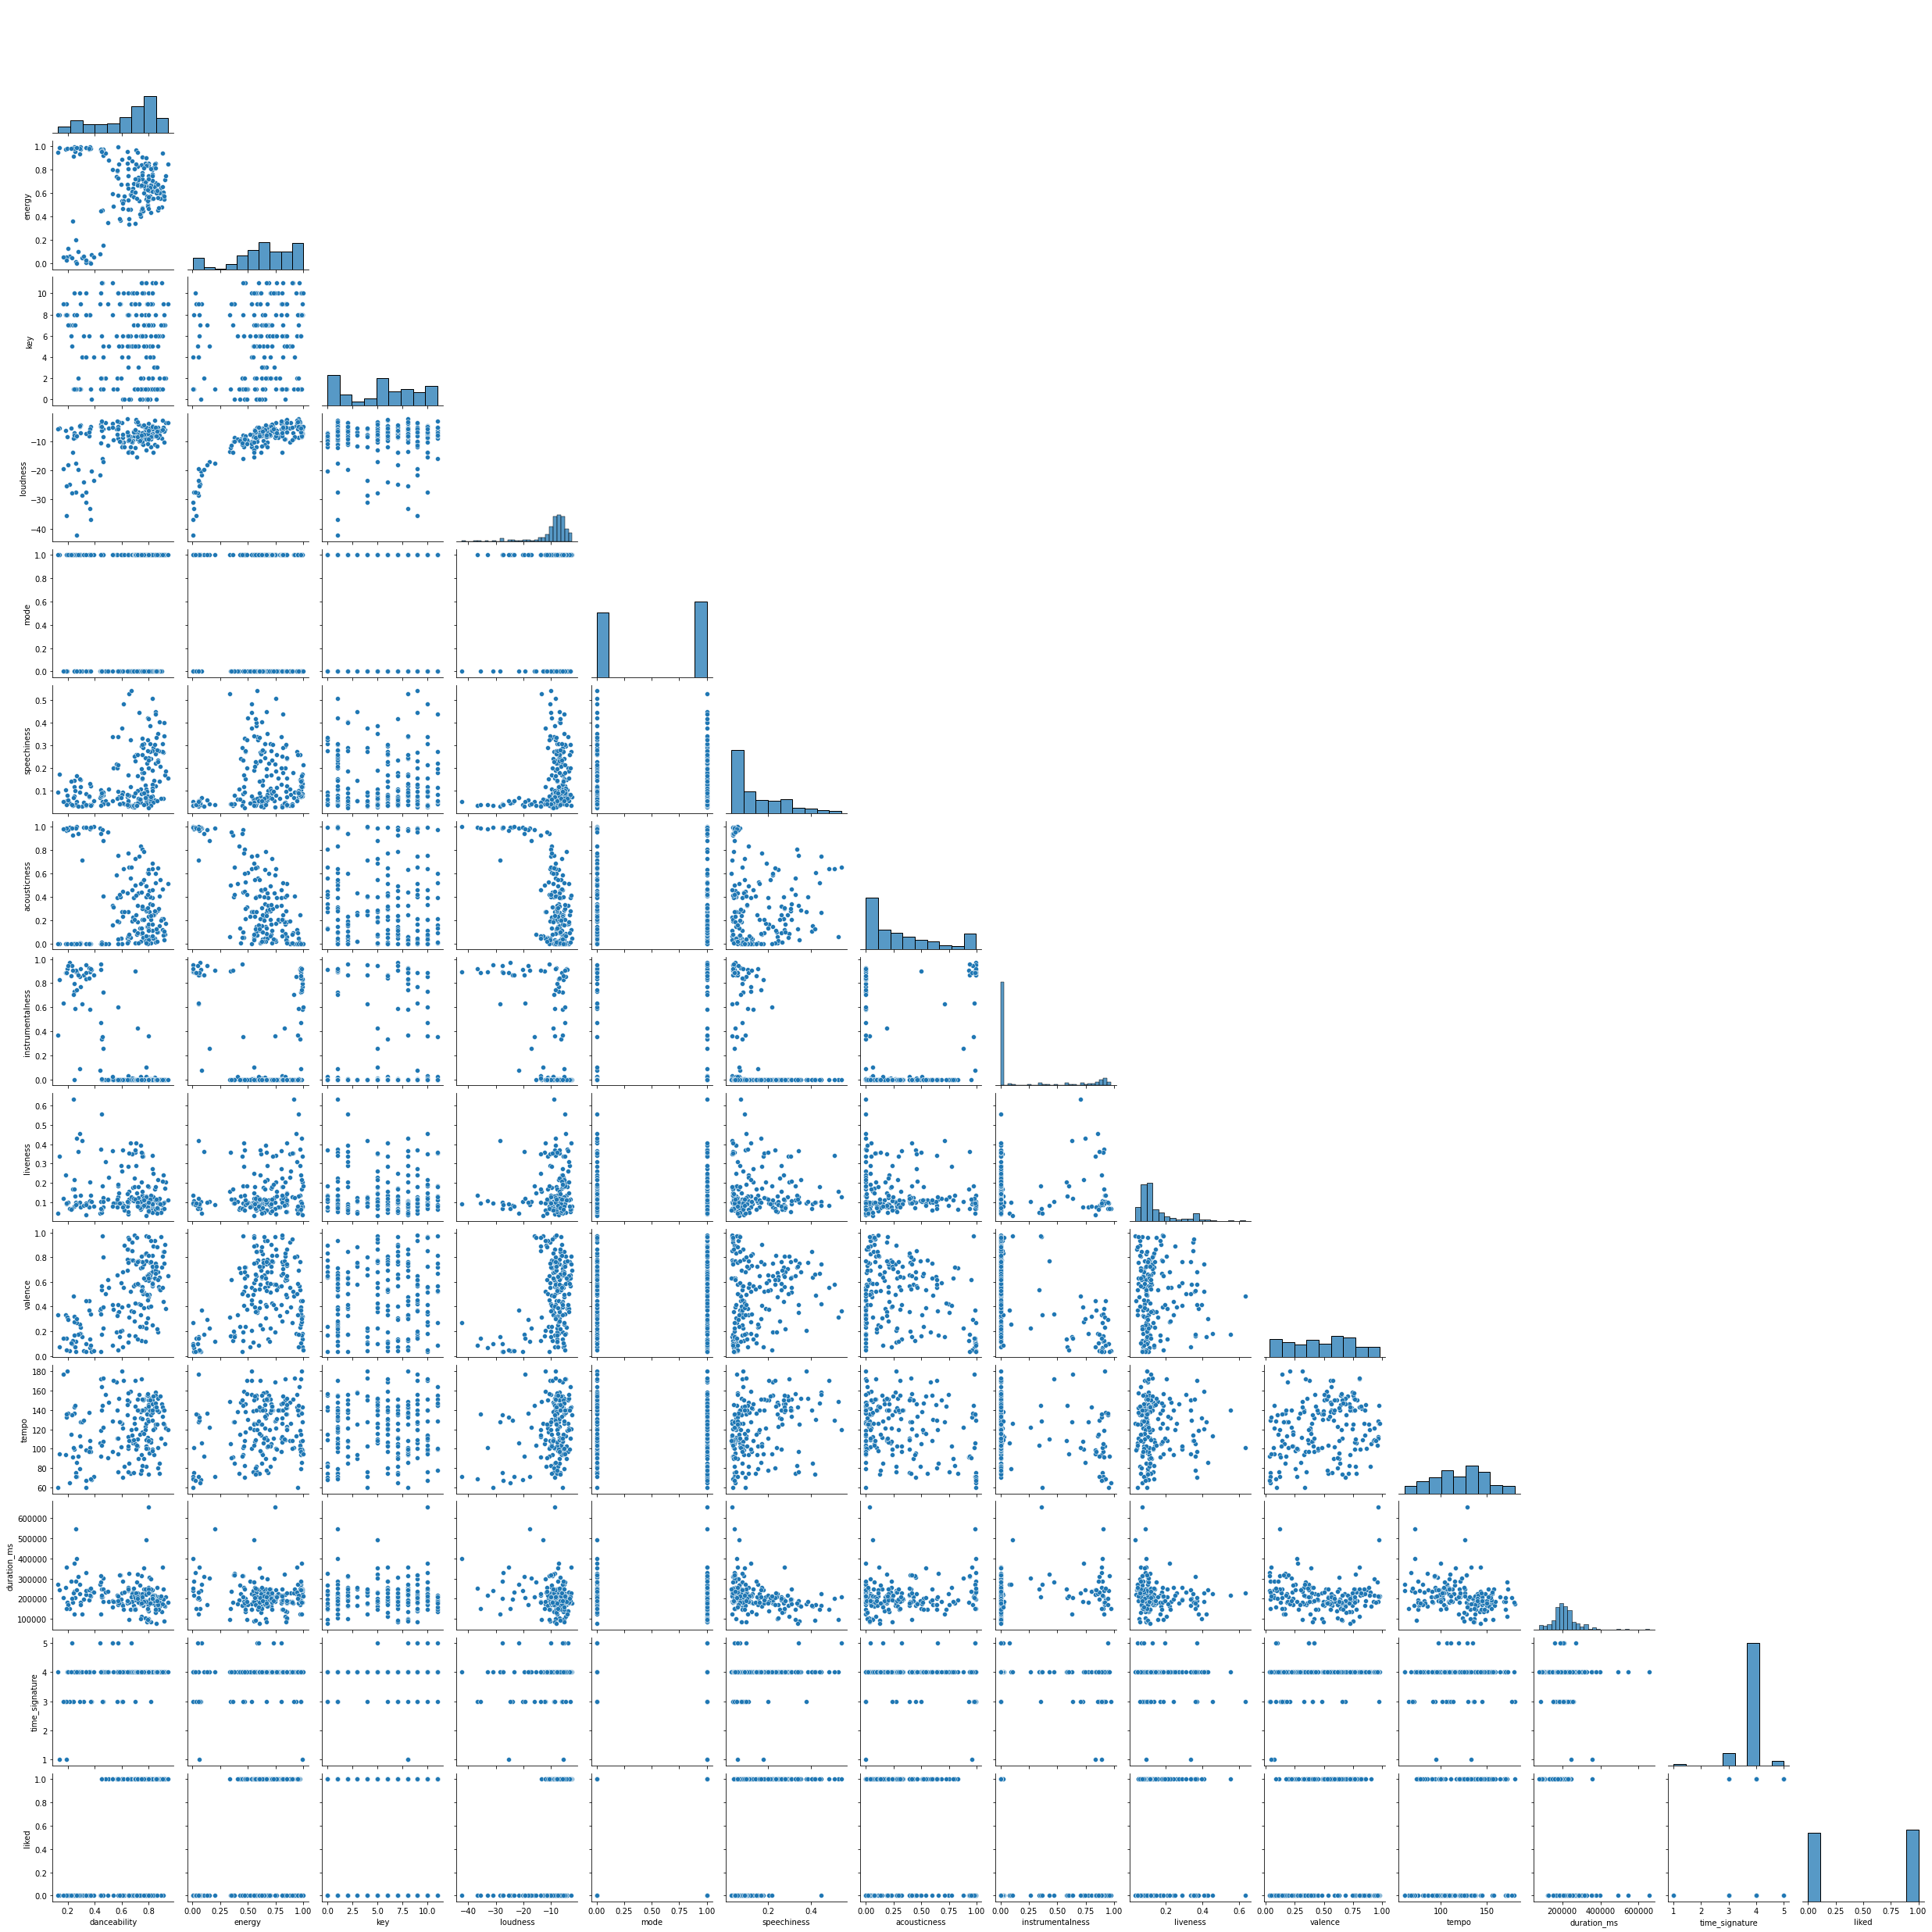

In [7]:
sns.pairplot(spotifyData,kind = "scatter", corner = True)

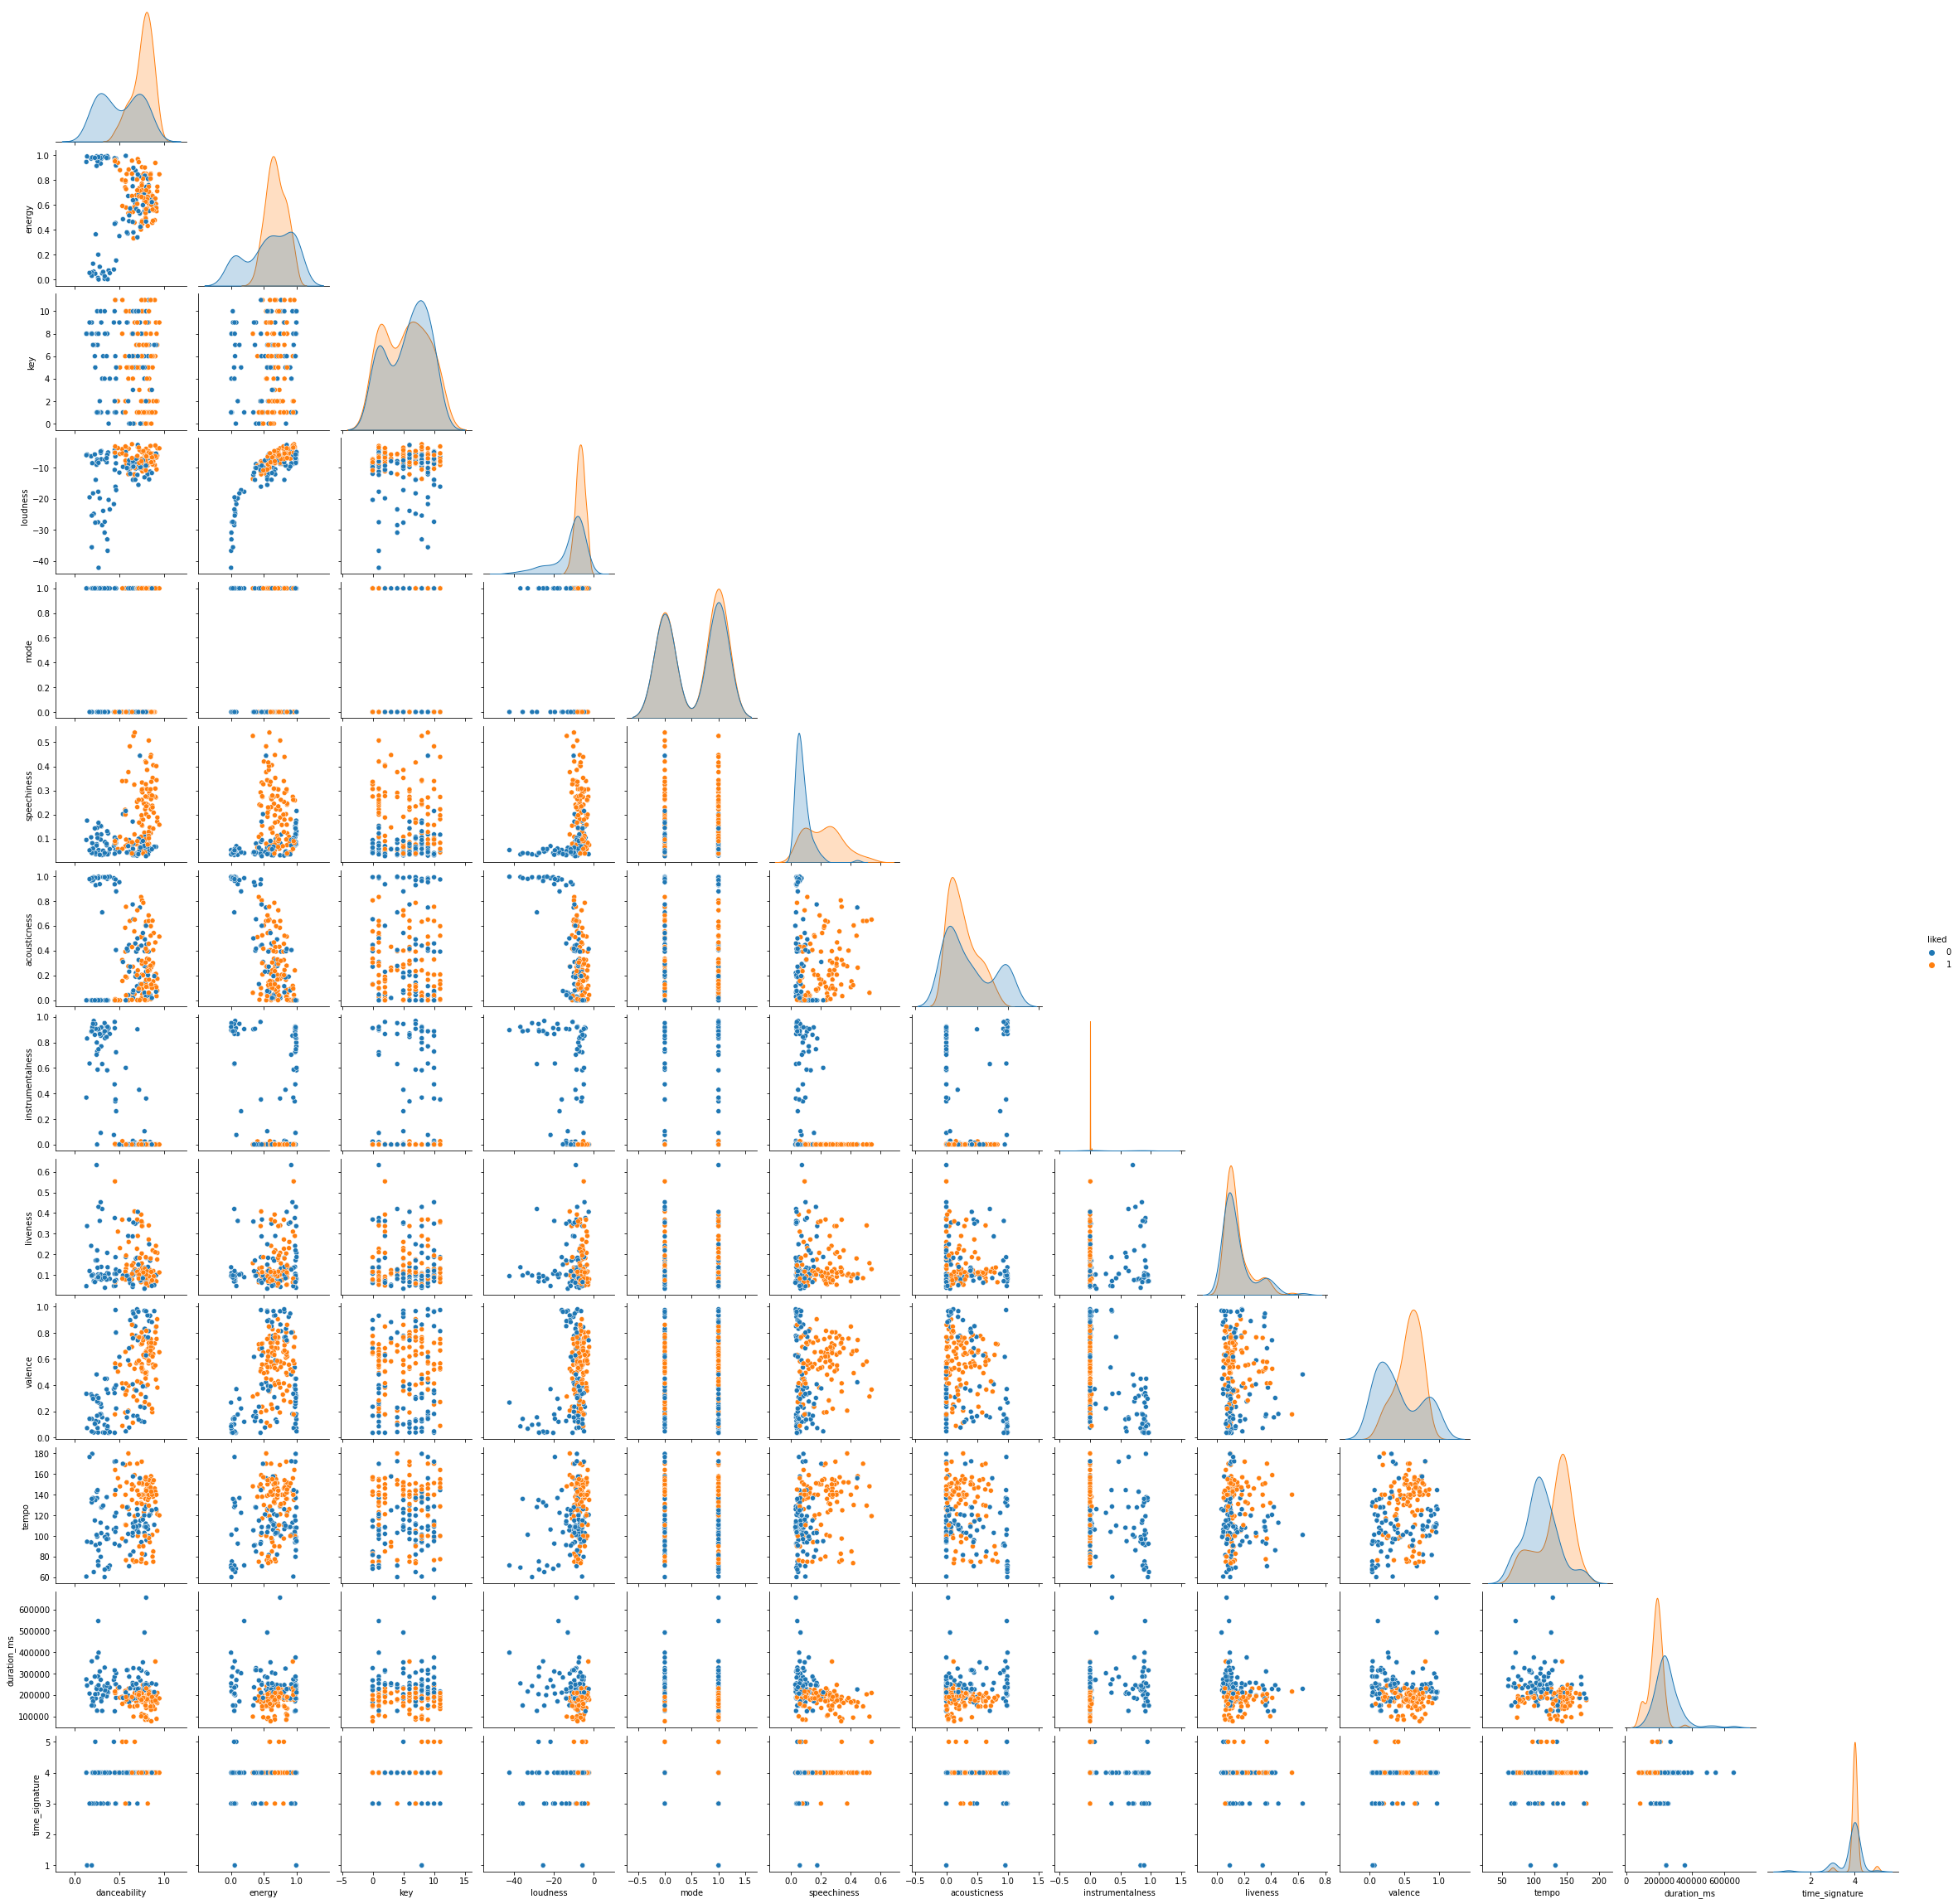

In [8]:
sns.pairplot(spotifyData,hue='liked',kind = "scatter", corner = True)

Se realizó el gráfico de pareja normal y uno con tono reflejando la variable objetivo.

* danceability: Posee una distribución normal con sesgo a la izquierda. Al obervarla con la diferenciación de la variable objetivo, se observa que las canciones favoritas tiene una distribución normal con sesgo a la izquierda, mientras que las canciones que no son favoritas tiene una distribución bimodal. Tiene una mayor distribución a que una canción esté en favorita si es más bailable.

* energy: Posee una distribución con sesgo a la izquierda, en la cual al diferenciarla mediante la variable objetivo, podemos que a mayor enérgica sea la canción, tiene probabilidad de encontrarse en la distribución de los me gusta.

* key: Posee una distribución con tendencia uniforme entre las 11 tonalidades, en la cual, al separarla por variable objetivo, se puede apreciar que no tienen una diferencia considerable.

* loudness: Distribución con sesgo a la izquierda. Al separar por variable objetivo, se logra apreciar una kurtosis positiva para las canciones favoritas. Mientras más cercano se encuentre de los 0 dB, es más probable que esté en favorito la canción.

* mode: Variable dicotómica, sin diferencia en las distribuciones por variable objetivo.

* speechiness: Distribución con sesgo a la derecha. Las canciones favoritas tuvieron una kurtosis negativa, mientras que las que no gustan, poseen una kurtosis positiva, centrada cerca del 0, con baja presencia de palabras.

* aousticness: Distribución con sesgo a la derecha. Poseen una distribución semejante al diferenciarlos mediante la variable objetivo, sin embargo, se establecen zonas en las que las canciones que no son favoritas predominan.

* instrumentalness: En su mayoria se encuentran cercana a cero.

* liveness: Distribución normal con sesgo a la derecha, no se observa diferencia apreciable en cuanto a la distribución si separamos por canciones favoritas o no favoritas.

* valence: Se asemeja a una distribución uniforme. Si revisamos la información distribuida acorde a la variable "liked", cada distribución se centra en zonas especificas. Para las canciones que son favoritas posee una distribución normal, mientras que las canciones que no gustan, tiene una distribución bimodal.

* tempo: Distribución normal. Para las canciones favoritas, el tempo es ligeramente mayor que para las canciones que no son favoritas.

* duration_ms: Distribución con sesgo a la derecha. Las canciones favoritas, tienden a tener una duración más corta.

* time_signature: Variable categórica de 5 varolores, cuya mayor predominancia se encuentra en el valor 4.

* liked: Variable dicotómica equitativa.

## Correlación

### Gráfica de Correlación

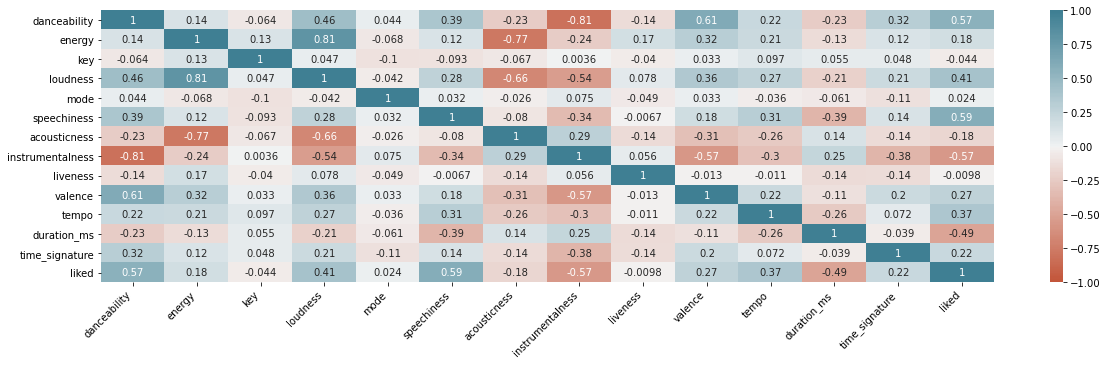

In [9]:
plt.rcParams['figure.figsize'] = [20, 5];
corr= spotifyData.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False, 
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Análisis de Gráfica de correlación

1. Se observa una correlación positiva fuerte (0.81) entre las variables loudness y energy. Relación que posee lógica al indicar que mientras mayor volumen en dB en la canción existe mayor energía.

2. Se observa una fuerte relación negativa de -0.81, entre las variables instrumental y danceability. Mientras más instrumental es una canción menos bailable es.

3. Se observa una correlación negativa medio fuerte (-0.77) entre las variables acousticness y energy. Es decir que mientras más acústica es una canción menos enérgica es.


## Preprocesamiento

Para el pre procesamiento se escalarán las variables loudness, tempo, duration_ms y key. debido a que los valores mínimos y máximos presentarán un gran peso en modelo en comparación con el valor numérico de las demás variables.

Una vez escalados los valores, se lo dividirá en data para el entrenamiento y para el test, con una proporción de 80-20.

In [10]:
# Librerias:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , roc_auc_score , confusion_matrix
from sklearn.preprocessing import StandardScaler #z = (x - u) / s

In [11]:
# Obtención de los predictores (X) y la variable objetivo (y)
X = spotifyData.drop('liked' , axis = 1)
y = spotifyData['liked']

sc = StandardScaler()
spotifyData[['loudness', 'tempo', 'duration_ms', 'key']] = sc.fit_transform(spotifyData[['loudness', 'tempo', 'duration_ms', 'key']])

In [12]:
#spotifyData.describe()

In [13]:
# Separación en data para entrenamiento y test. Se trabajará con una proporción de 80-20.
x_train , x_test , y_train , y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Modelamiento

## SVM
Primer algortimo a tratar es la máquina de soporte vectorial (SVM).

Probaremos 1 modelo con los 4 kernels

### Revisión de diferentes kernels para el clasificador SVM

In [14]:
# Kernels a probar:
kernels = ['Polinómico', 'RBF', 'Sigmoide','Lineal']

# Función que retorna los parámetros:
def getClassifier(index_i):
    if index_i == 0:
        # Kernel de polinomio
        return SVC(kernel='poly', degree=8, gamma="auto", random_state=123)
    elif index_i == 1:
        # Kernel: Radial Basis Function
        return SVC(kernel='rbf', gamma="auto", random_state=123)
    elif index_i == 2:
        # Kernel: Sigmoide
        return SVC(kernel='sigmoid', gamma="auto", random_state=123)
    elif index_i == 3:
        # Kernel: Lineal
        return SVC(kernel='linear', gamma="auto", random_state=123)

In [15]:
from sklearn.metrics import classification_report
# Entrenar con los diferentes kernels:
for i in range(4):
    svclassifier = getClassifier(i) 
    svclassifier.fit(x_train, y_train)# Predicción
    y_pred = svclassifier.predict(x_test)# Evaluación
    print("Evaluación del:", "kernel", kernels[i])
    print(classification_report(y_test,y_pred))

Evaluación del: kernel Polinómico
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.46      1.00      0.63        18

    accuracy                           0.46        39
   macro avg       0.23      0.50      0.32        39
weighted avg       0.21      0.46      0.29        39

Evaluación del: kernel RBF
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.46      1.00      0.63        18

    accuracy                           0.46        39
   macro avg       0.23      0.50      0.32        39
weighted avg       0.21      0.46      0.29        39

Evaluación del: kernel Sigmoide
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.46      1.00      0.63        18

    accuracy                           0.46        39
   macro avg       0.23      0.50  

Se establecieron 4 kernels, de los cuales el valor de gamma y C, se los dejaron con los valores por default. 

Se describen la precision y recall para la predicción en relación a la categoría 1.

| Kernel | Accuracy | Precision_1 | Recall_1 |
| --- | --- | --- | --- |
| lineal | 0.85 | 0.88 | 0.78 |
| Sigmoide |0.46 | 0.46 | 1.0 |
| RBF | 0.46 | 0.46 | 1.0 |
| Polinomio | 0.46 | 0.46 | 1.0 |


A partir de los resultados previos se aprecia que el kernel que mejor permite clasificar es el **lineal**. Nos proporciona un accuracy de 0.85 general.

Si deseamos revisar el mejor hiperparámetro del modelo, se procede a realizar un tuning dentro del modelo, para lo cual estableceremos un grid de busqueda, este grid es con valores fijos. Se realizará el tuning para el modelo lineal.

In [16]:
# Librería para establecer el grid
from sklearn.model_selection import GridSearchCV

# parámetros del grid
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['linear']}

In [17]:
grid = GridSearchCV(SVC(random_state=123),
                    param_grid,
                    refit=True,
                    cv = 3, verbose=3)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END ..................C=0.1, gamma=1, kernel=linear; total time=   6.0s
[CV 2/3] END ..................C=0.1, gamma=1, kernel=linear; total time=  21.4s
[CV 3/3] END ..................C=0.1, gamma=1, kernel=linear; total time=   2.7s
[CV 1/3] END ................C=0.1, gamma=0.1, kernel=linear; total time=   6.0s
[CV 2/3] END ................C=0.1, gamma=0.1, kernel=linear; total time=  20.9s
[CV 3/3] END ................C=0.1, gamma=0.1, kernel=linear; total time=   2.7s
[CV 1/3] END ...............C=0.1, gamma=0.01, kernel=linear; total time=   5.9s
[CV 2/3] END ...............C=0.1, gamma=0.01, kernel=linear; total time=  22.0s
[CV 3/3] END ...............C=0.1, gamma=0.01, kernel=linear; total time=   2.9s
[CV 1/3] END ..............C=0.1, gamma=0.001, kernel=linear; total time=   5.9s
[CV 2/3] END ..............C=0.1, gamma=0.001, kernel=linear; total time=  20.6s
[CV 3/3] END ..............C=0.1, gamma=0.001, k

GridSearchCV(cv=3, estimator=SVC(random_state=123),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']},
             verbose=3)

En el grid se estableció los parámetros para el kernel lineal. 
Una vez que se termine de computar los 16 casos mediante el uso de la técnica del CV con 3 folds, seleccionaremos el mejor estimador. En total se generarán 48 ajustes.

In [18]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=1, kernel='linear', random_state=123)


In [19]:
# Creación del modelo con los mejores estimadores.
modelo = SVC(C=0.1, gamma=1, kernel='linear', random_state=123)
modelo.fit(x_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear', random_state=123)

In [20]:
y_pred_scv = modelo.predict(x_test)
accuracy_score(y_test, y_pred_scv)

0.8974358974358975

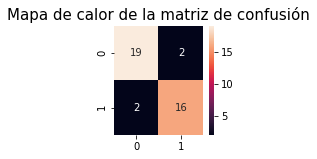

In [21]:
plt.rcParams['figure.figsize'] = [2, 2];
conf_mat = confusion_matrix(y_test, y_pred_scv)
plt.title('Mapa de calor de la matriz de confusión', fontsize = 15)
sns.heatmap(conf_mat, annot = True)
plt.show()

In [22]:
print(classification_report(y_test, y_pred_scv))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.89      0.89      0.89        18

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



## Redes Neuronales

El segundo modelo a probar es mediante una Red Neuronal Perceptrón Multicapa.

In [23]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), 
                           max_iter=300,
                           activation = 'relu',
                           solver='sgd',
                           random_state=123)


In [24]:
#Entrenamos
classifier.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=123,
              solver='sgd')

In [25]:
#Predicción sobre las instancias de prueba
y_pred_MLP = classifier.predict(x_test)

In [26]:
#Comparar resultados
confusion_matrix(y_pred_MLP, y_test)

array([[ 0,  0],
       [21, 18]], dtype=int64)

In [27]:
print(classification_report(y_test, y_pred_MLP))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.46      1.00      0.63        18

    accuracy                           0.46        39
   macro avg       0.23      0.50      0.32        39
weighted avg       0.21      0.46      0.29        39



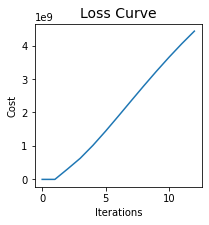

In [28]:
plt.rcParams['figure.figsize'] = [3, 3];
plt.plot(classifier.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

El modelo de red neuronal no está generando buenos resultados bajo esos hiperparámetros. Por lo cual, estableceremos un Grid de busqueda, y revisaremos si nos permite obtener mejores resultados.

In [29]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30), (20,10,2)],
    'max_iter': [2, 10, 50, 100, 150, 200, 300],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.01, 0.05, 0.1],
    'learning_rate': ['constant','adaptive','invscaling']
}

In [30]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

In [31]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=2, verbose=2)
grid.fit(x_train, y_train)

Fitting 2 folds for each of 2688 candidates, totalling 5376 fits


GridSearchCV(cv=2,
             estimator=MLPClassifier(hidden_layer_sizes=(150, 100, 50),
                                     max_iter=300),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.01, 0.05, 0.1],
                         'hidden_layer_sizes': [(150, 100, 50), (120, 80, 40),
                                                (100, 50, 30), (20, 10, 2)],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling'],
                         'max_iter': [2, 10, 50, 100, 150, 200, 300],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [32]:
print(grid.best_params_) 

{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 30), 'learning_rate': 'invscaling', 'max_iter': 150, 'solver': 'adam'}


In [33]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,50,30),
                        activation = 'tanh',
                        alpha=0.01,
                        learning_rate = 'constant', 
                        max_iter = 50, 
                        solver = 'adam')
mlp_clf.fit(x_train, y_train)

MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(100, 50, 30),
              max_iter=50)

In [34]:
#Predicción sobre las instancias de prueba
y_pred = mlp_clf.predict(x_test)

In [35]:
#Comparar resultados
confusion_matrix(y_pred, y_test)

array([[ 0,  0],
       [21, 18]], dtype=int64)

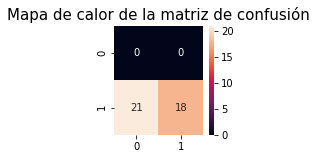

In [36]:
plt.rcParams['figure.figsize'] = [2, 2];
conf_mat = confusion_matrix(y_pred, y_test)
plt.title('Mapa de calor de la matriz de confusión', fontsize = 15)
sns.heatmap(conf_mat, annot = True)
plt.show()

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.46      1.00      0.63        18

    accuracy                           0.46        39
   macro avg       0.23      0.50      0.32        39
weighted avg       0.21      0.46      0.29        39



# Análisis:

Se probó realizar el modelamiento mediante la selección del hiperparámetro óptimo, tanto para el modelo con SVM y con Red Neuronal. 

* Mediante SVM, se logró obtener el mejor modelo de clasificación entre 4 kernels, lo cual, nos dejó con un kernel lineal, sin embargo, al realizar, con hiperparámetros normales, se obtuvo un accuracy del 46%. Al momento de obtener el mejor hiperparámetro entre un grid, el accuracy obtenido se mantuvo en 46.

* El modelamiento mediante SVM fue un poco más demorado que mediante MLP, considerando la cantidad de modelos a ajustar en ambos casos.

* Se observó que la curva de Loss Vs Iterations fue incrementando, lo cual nos implica que el modelo no está clasificando correctamente.

* El modelo con el cual se queda para la presente práctica es mediante el SVM.

# Recomendaciones:

1. Es posible que generando un grid con valores random se logre obtener mejores métricas, por lo cual, para futuros trabajos, se propone realizar el análisis con esta característica.


# Link jupyter:
https://github.com/josep5097/TareasMaestria/tree/main/AprendizajeAutomatico/TA2